# LETTER RECOGNITION USING SVM AND ARTIFICIAL NEURAL NETWORK

<br>
<br>
<br>

Data Source: https://archive.ics.uci.edu/ml/datasets/letter+recognition <br>
<br>
<br>

**Data Set Information** :<br>
<br>

The character images of letters based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. <br>
<br>
<br>


**Attribute Information**:

1.	lettr	capital letter	(26 values from A to Z) 
2.	x-box	horizontal position of box	(integer) 
3.	y-box	vertical position of box	(integer) 
4.	width	width of box	(integer) 
5.	high height of box	(integer) 
6.	onpix	total # on pixels	(integer) 
7.	x-bar	mean x of on pixels in box	(integer) 
8.	y-bar	mean y of on pixels in box	(integer) 
9.	x2bar	mean x variance	(integer) 
10.	y2bar	mean y variance	(integer) 
11.	xybar	mean x y correlation	(integer) 
12.	x2ybr	mean of x * x * y	(integer) 
13.	xy2br	mean of x * y * y	(integer) 
14.	x-ege	mean edge count left to right	(integer) 
15.	xegvy	correlation of x-ege with y	(integer) 
16.	y-ege	mean edge count bottom to top	(integer) 
17.	yegvx	correlation of y-ege with x	(integer)
<br>
<br>
<br>
<br>
 
 
 






**Objective**
 <br>
The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet


In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

from keras.utils import np_utils 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [4]:
#Load the Drive helper and mount
from google.colab import drive

#This will prompt for authorization
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#loading data file into pandas dataframe
df=pd.read_csv("/content/drive/My Drive/Letter recognition/letter-recognition.data",header=None)

In [6]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [7]:
df[0].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
Z    734
H    734
Name: 0, dtype: int64

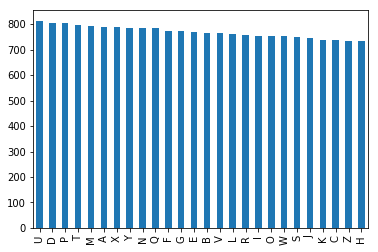

In [10]:
df[0].value_counts().plot.bar()

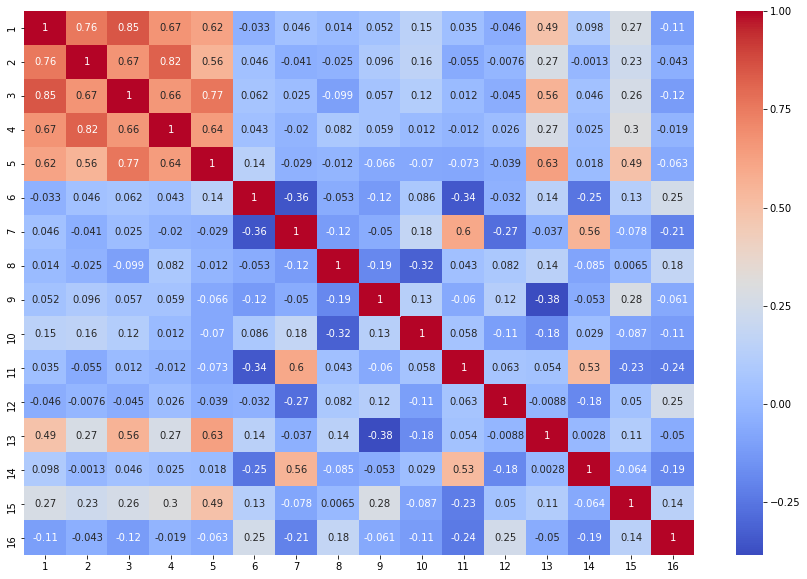

In [0]:
#Plottting a correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [0]:
#Storing the class labels in Y and the rest of the attributes in X
X=np.array(df.loc[:,1:16])
Y=np.array(df[0])

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

In [0]:
#Splitting the dataset into train data and test data
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, random_state=0)

In [0]:
X_train.shape

(16000, 16)

In [0]:
#Standardizing the data before applying TSNE
from sklearn.preprocessing import StandardScaler
std_X=StandardScaler().fit_transform(X)
print(std_X.shape)

(20000, 16)


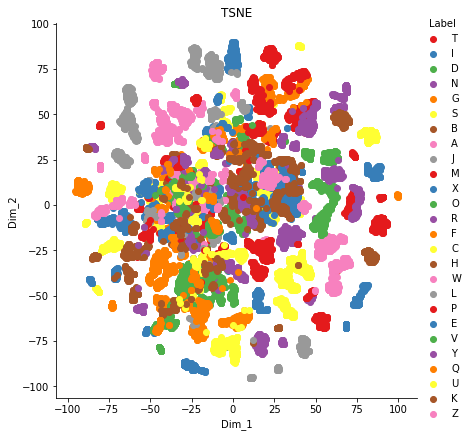

In [0]:
# TSNE with perplexity =30 and n_iter=1000

from sklearn.manifold import TSNE

l=Y
col=std_X

model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(col)

# creating a new data frame which help us in ploting the result data
tsne_data =np.vstack((tsne_data.T, l)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Label"))

# Ploting the result of tsne
import matplotlib.pyplot as plt

sns.FacetGrid(tsne_df,hue="Label",palette="Set1", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("TSNE")
plt.savefig('tsne.png')
plt.show()

# **SVM**

## LINEAR SVM

In [0]:
#SGD Classifier with hinge loss is an implementaion of Linear SVM
#HyperParameter Tuning Using GridsearchCV

from sklearn.model_selection import GridSearchCV
tuned_parameters= [{'alpha':[10**-4,10**-3, 10**-2, 10**0, 10**2,10**3, 10**4] ,'penalty': ['l1','l2']}]

clf = SGDClassifier(loss='hinge')


model = GridSearchCV(clf, tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)

print(model.best_estimator_)
lin_svm=model.score(X_test, Y_test)
print(lin_svm)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
0.61375


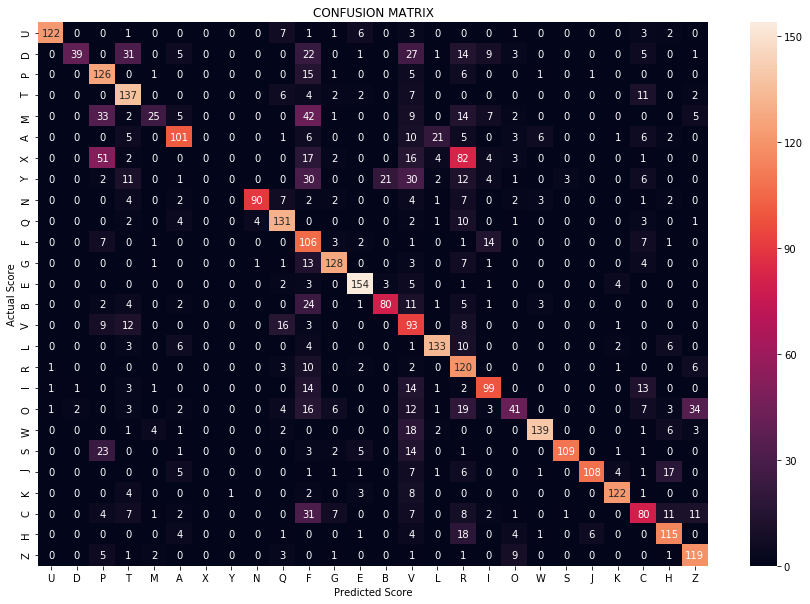

In [0]:
alph=df[0].value_counts().keys().tolist()

from sklearn.metrics import confusion_matrix

clf=SGDClassifier(alpha=0.01, loss='hinge', penalty='l2')
clf.fit(X_train,Y_train)

pred = clf.predict(X_test)
con_mat=confusion_matrix(Y_test,pred)

cmt=pd.DataFrame(con_mat,index=alph,columns=alph)

#plotting confusion matrix

plt.figure(figsize = (15,10))
sns.heatmap(cmt,annot=True, fmt="d")
plt.title("CONFUSION MATRIX")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.show()

In [0]:
final_model = model.best_estimator_
Y_pred = final_model.predict(X_test)

print(classification_report(Y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train, Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , Y_test ))


              precision    recall  f1-score   support

           A       0.67      0.88      0.76       147
           B       0.31      0.81      0.45       158
           C       0.89      0.67      0.76       156
           D       0.84      0.73      0.78       171
           E       0.79      0.31      0.45       145
           F       0.93      0.32      0.47       167
           G       0.00      0.00      0.00       182
           H       0.13      0.18      0.15       123
           I       0.94      0.77      0.85       127
           J       0.92      0.76      0.83       159
           K       0.20      0.87      0.32       143
           L       0.79      0.81      0.80       159
           M       0.82      0.90      0.86       173
           N       0.77      0.57      0.66       134
           O       0.62      0.26      0.37       142
           P       0.62      0.88      0.73       165
           Q       0.71      0.65      0.68       145
           R       0.89    

## RBF SVM

In [0]:
from sklearn.svm import SVC
#Hyperparameter tuning RBF SVM
tuned_parameters= [{'C': np.logspace(-5,5,11,base=2),'gamma': np.logspace(-5,5,11,base=2)}]

model = GridSearchCV(SVC(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train, Y_train)

print(model.best_estimator_)
rbf_svm=model.score(X_test, Y_test)
print(rbf_svm)

SVC(C=32.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.98175


In [0]:

print(pd.crosstab(Y_test, Y_pred, rownames=['Actual Letter'], colnames=['Predicted Letter']))
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train, Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , Y_test ))


Predicted Letter    A    B    C    D    E    F  ...    U    V    W    X    Y    Z
Actual Letter                                   ...                              
A                 147    0    0    0    0    0  ...    0    0    0    0    0    0
B                   0  151    0    0    0    0  ...    0    3    0    0    0    0
C                   0    0  156    0    0    0  ...    0    0    0    0    0    0
D                   1    1    0  166    0    0  ...    0    0    0    0    0    0
E                   0    1    0    0  139    0  ...    0    0    0    1    0    0
F                   0    0    0    1    0  163  ...    0    0    0    0    0    0
G                   0    1    0    2    1    0  ...    0    1    0    0    0    0
H                   0    0    0    0    0    0  ...    1    0    0    0    0    0
I                   0    0    0    0    0    1  ...    0    0    0    0    0    0
J                   0    0    0    0    0    0  ...    0    0    0    0    0    0
K               

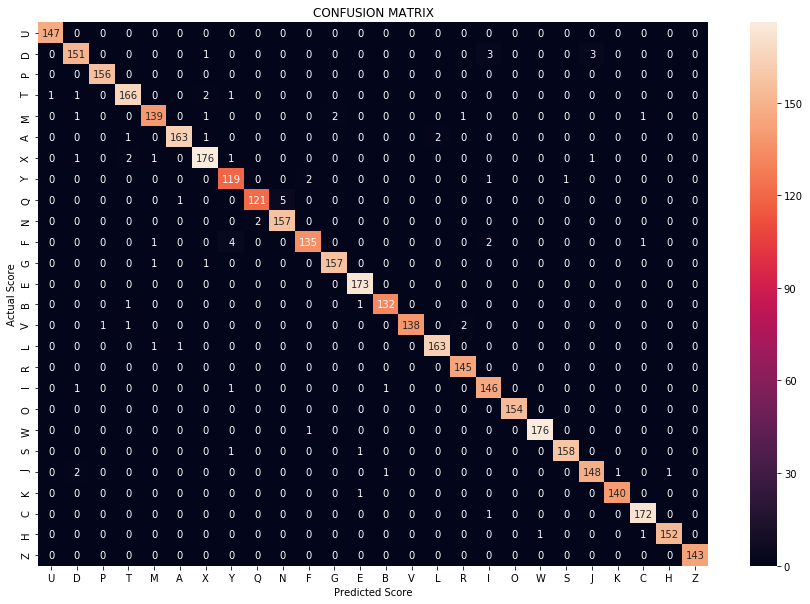

In [0]:


clf=SVC(C=32,gamma=.03125)
clf.fit(X_train,Y_train)

pred = clf.predict(X_test)
con_mat=confusion_matrix(Y_test,pred)

cmt=pd.DataFrame(con_mat,index=alph,columns=alph)

#plotting confusion matrix

plt.figure(figsize = (15,10))
sns.heatmap(cmt,annot=True, fmt="d")
plt.title("CONFUSION MATRIX")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.show()

# **ANN**

## 3 Layer Neural Network

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size=0.2, random_state=0)

In [0]:
output_dim = 26
input_dim = X_train.shape[1]


In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

#Hyperparameter tuning mini_batch size and number of epochs
def create_model():


      model = Sequential()

      model.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.3535, seed=None)))
      model.add(BatchNormalization())

      model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)) )
      model.add(BatchNormalization())

      model.add(Dense(output_dim, activation='softmax'))


      model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
      return model
    
    
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [32, 64, 100, 128,256]
epochs = [10,20,30,50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

W0820 14:36:30.766834 139775315646336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 14:36:30.787853 139775315646336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 14:36:30.791643 139775315646336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0820 14:36:30.883553 139775315646336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0820 14:36:31.005095 13

Best: 0.960125 using {'batch_size': 100, 'epochs': 100}


In [15]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.3535, seed=None)))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)) )
model.add(BatchNormalization())

model.add(Dense(output_dim, activation='softmax'))


model.summary()

W0820 18:09:24.182644 140435466938240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 18:09:24.222309 140435466938240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 18:09:24.233094 140435466938240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0820 18:09:24.322647 140435466938240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0820 18:09:24.422433 14

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               8704      
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 26)                3354      
Total params: 80,282
Trainable params: 79,002
Non-trainable params: 1,280
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=100, epochs=100, verbose=1, validation_data=(X_test, Y_test))

Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - 4s 253us/step - loss: 1.0973 - acc: 0.7041 - val_loss: 0.5774 - val_acc: 0.8472
Epoch 2/100
16000/16000 [==============================] - 1s 58us/step - loss: 0.4889 - acc: 0.8641 - val_loss: 0.4067 - val_acc: 0.8880
Epoch 3/100
16000/16000 [==============================] - 1s 58us/step - loss: 0.3419 - acc: 0.9049 - val_loss: 0.2950 - val_acc: 0.9182
Epoch 4/100
16000/16000 [==============================] - 1s 58us/step - loss: 0.2644 - acc: 0.9234 - val_loss: 0.2433 - val_acc: 0.9290
Epoch 5/100
16000/16000 [==============================] - 1s 59us/step - loss: 0.2132 - acc: 0.9394 - val_loss: 0.2091 - val_acc: 0.9385
Epoch 6/100
16000/16000 [==============================] - 1s 58us/step - loss: 0.1832 - acc: 0.9467 - val_loss: 0.1816 - val_acc: 0.9465
Epoch 7/100
16000/16000 [==============================] - 1s 58us/step - loss: 0.1546 - acc: 0.9551 - val_loss: 0.1775 - 

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [19]:
nscore = model.evaluate(X_train, Y_train, verbose=0) 
print('Train score:', nscore[0]) 
print('Train accuracy:',nscore[1])


Train score: 0.007537657834254787
Train accuracy: 0.997875


Test score: 0.10800886660674587
Test accuracy: 0.9715


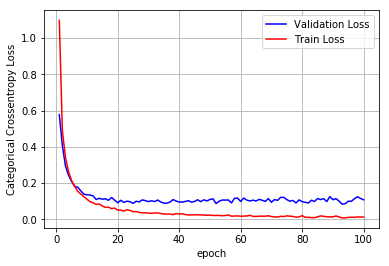

In [20]:
nscore = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', nscore[0]) 
print('Test accuracy:',nscore[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,100+1))


# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)




## 4 Layer Neural Network

In [0]:
#Hyperparameter tuning mini_batch size and number of epochs
def create_model():


      model = Sequential()

      model.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.3535, seed=None)))
      model.add(BatchNormalization())

      model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)) )
      model.add(BatchNormalization())
      
      model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
      model.add(BatchNormalization())


      model.add(Dense(output_dim, activation='softmax'))


      model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
      return model
    
    
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [32, 64, 100, 128,256]
epochs = [10,20,30,50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.965250 using {'batch_size': 128, 'epochs': 100}


In [25]:
model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.2773, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1245, seed=None)) )
model_batch.add(BatchNormalization())


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               8704      
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
dense_11 (Dense)             (None, 26)                3354      
Total para

In [26]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_test, Y_test))

Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - 2s 127us/step - loss: 1.1064 - acc: 0.7034 - val_loss: 0.5506 - val_acc: 0.8528
Epoch 2/100
16000/16000 [==============================] - 1s 58us/step - loss: 0.4323 - acc: 0.8819 - val_loss: 0.3465 - val_acc: 0.9018
Epoch 3/100
16000/16000 [==============================] - 1s 58us/step - loss: 0.2907 - acc: 0.9180 - val_loss: 0.2569 - val_acc: 0.9270
Epoch 4/100
16000/16000 [==============================] - 1s 58us/step - loss: 0.2203 - acc: 0.9361 - val_loss: 0.2034 - val_acc: 0.9377
Epoch 5/100
16000/16000 [==============================] - 1s 59us/step - loss: 0.1762 - acc: 0.9472 - val_loss: 0.1857 - val_acc: 0.9413
Epoch 6/100
16000/16000 [==============================] - 1s 57us/step - loss: 0.1433 - acc: 0.9576 - val_loss: 0.1689 - val_acc: 0.9467
Epoch 7/100
16000/16000 [==============================] - 1s 58us/step - loss: 0.1273 - acc: 0.9620 - val_loss: 0.1394 - 

In [27]:
mscore = model_batch.evaluate(X_train, Y_train, verbose=0) 
print('Traint score:', mscore[0]) 
print('Train accuracy:',mscore[1])


Traint score: 0.014564356140006566
Train accuracy: 0.995875


Test score: 0.09829978048673366
Test accuracy: 0.97425


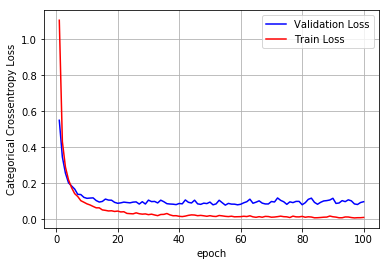

In [28]:
mscore = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mscore[0]) 
print('Test accuracy:',mscore[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,100+1))

# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)




## CONCLUSIONS

In [30]:
#CREATING PRETTYTABLE
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Classifier", "Train Accuracy","Test Accuracy"]
 
x.add_row(["LINEAR SVM",'60.61%','61.37%'])
x.add_row(["RBF SVM",'  99.99%','98.17%'])
x.add_row(["3 LAYER NN",'99.78%','97.15%'])
x.add_row(["4 LAYER NN",'99.58%','97.42%'])
print(x)

+------------+----------------+---------------+
| Classifier | Train Accuracy | Test Accuracy |
+------------+----------------+---------------+
| LINEAR SVM |     60.61%     |     61.37%    |
|  RBF SVM   |      99.99%    |     98.17%    |
| 3 LAYER NN |     99.78%     |     97.15%    |
| 4 LAYER NN |     99.58%     |     97.42%    |
+------------+----------------+---------------+
